In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 9.8/9.8 MB 87.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Carregar o dataset gerado
df = pd.read_csv('data\generated_dataset.csv')


<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\g'
C:\Users\hsouz\AppData\Local\Temp\ipykernel_26784\3862841578.py:2: SyntaxWarning: invalid escape sequence '\g'
  df = pd.read_csv('data\generated_dataset.csv')


In [8]:
# Definir variáveis independentes e dependente
X = df.drop('encargos', axis=1)
y = df['encargos']

# Identificar colunas numéricas e categóricas
num_features = ['idade', 'imc', 'filhos']
cat_features = ['gênero', 'fumante', 'região']

# Pré-processamento para variáveis numéricas e categóricas
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])


In [9]:
# Pipeline completo com o pré-processador e o modelo de Regressão Linear
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Treinar o modelo
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'imc', 'filhos']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gênero', 'fumante',
                                                   'região'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 14468.850279251386
R²: -0.24702823832817056


In [19]:


# Adicionar coluna de constante e criar dummies para `statsmodels`
X_train_sm = sm.add_constant(pd.get_dummies(X_train, drop_first=True))

# Verificar se todas as colunas estão no tipo float e se há NaNs
X_train_sm = X_train_sm.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

# Converter `y_train` para numpy array e verificar se está no formato adequado
y_train = np.asarray(y_train).astype(float)

# Verificar se as dimensões coincidem
print("Dimensão de X_train_sm:", X_train_sm.shape)
print("Dimensão de y_train:", y_train.shape)

# Treinar o modelo OLS
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Exibir o resumo estatístico
print(model_sm.summary())



Dimensão de X_train_sm: (80, 9)
Dimensão de y_train: (80,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.6271
Date:                Tue, 05 Nov 2024   Prob (F-statistic):              0.752
Time:                        19:16:37   Log-Likelihood:                -876.90
No. Observations:                  80   AIC:                             1772.
Df Residuals:                      71   BIC:                             1793.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

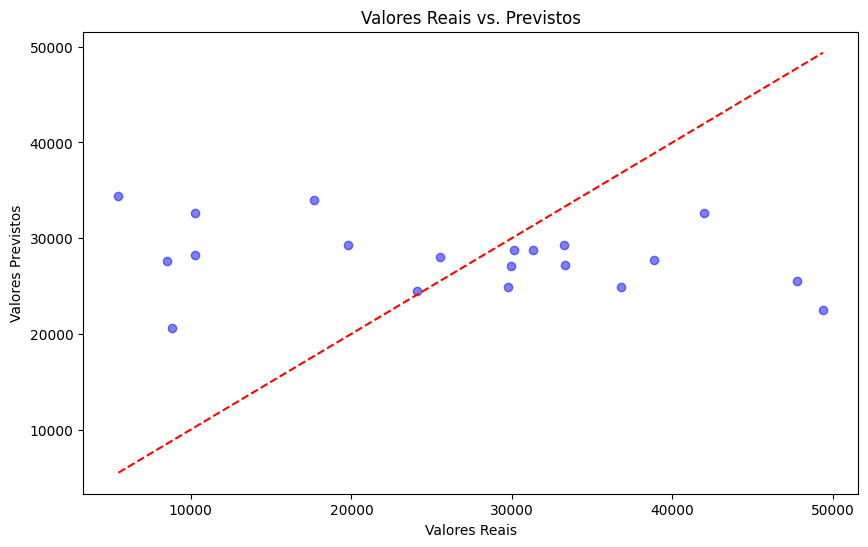

In [14]:
# Gráfico de dispersão para valores reais vs. previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Previstos')
plt.show()
